<a href="https://colab.research.google.com/github/Elhai12/SBA_loans_predict/blob/main/EDA_Exploration_Visualization_Corraletion_and_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [2]:
#Clone git to get the files
!git clone https://github.com/Elhai12/SBA_loans_predict.git

Cloning into 'SBA_loans_predict'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 74 (delta 36), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 8.85 MiB | 5.03 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore')
from geopy.geocoders import Nominatim
import time
from autoviz.AutoViz_Class import AutoViz_Class
import plotly.express as px
import plotly.subplots as sp
from scipy.stats import mannwhitneyu,chisquare,chi2_contingency
import plotly.express as px
from SBA_loans_predict import Functions_for_EDA

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
df = pd.read_pickle("/content/SBA_loans_predict/sba_loans_flat_pkl")

# **Protocols**

In [8]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(exclude=np.number).columns.tolist()

['NewExist',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'MIS_Status',
 'Region',
 'Is_Franchise',
 'Category_bank',
 'Sector_group']

In [6]:
#Use excelwriter from pandas to create on file of protocols with multiple sheets
with pd.ExcelWriter("loans_protocol.xlsx", engine="openpyxl") as writer:
    # Type of values
    df.dtypes.to_excel(writer, sheet_name='data_type')

    # Maximum values
    df[num_columns].max().to_excel(writer, sheet_name='max')

    # Minimum values
    df[num_columns].min().to_excel(writer, sheet_name='min')

    # Missing values
    df.isnull().sum(axis=0).to_excel(writer, sheet_name='NA')

    # Unique values
    df.nunique().to_excel(writer, sheet_name='unique')

In [9]:
df_for_eda = df.copy()
df_for_eda['MIS_Status'] = df_for_eda['MIS_Status'].map({'CHGOFF':1,'P I F':0})

In [10]:
cat_columns.remove('MIS_Status')
for col in cat_columns:
  df_for_eda[col] = pd.Categorical(df_for_eda[col]).codes

In [11]:
num_columns = [c for c in num_columns if c not in ['NewExist','Is_Franchise','UrbanRural']]
cat_columns = cat_columns + ['NewExist','Is_Franchise','UrbanRural']


# Descriptive Statistics

In [12]:
df.describe().T

count       mean            std         min     25%    \
ApprovalFY         41212.0    2002.473915       4.985088  1971.0   1999.0   
Term               41212.0     110.743546      79.484949     0.0     60.0   
NoEmp              41212.0       9.030452      23.316526     0.0      2.0   
CreateJob          41212.0       4.138406     130.405083     0.0      0.0   
RetainedJob        41212.0       6.163350     132.268420     0.0      0.0   
DisbursementGross  41212.0  206791.720834  307661.611129     0.0  35057.0   
GrAppv             41212.0  198424.634767  309303.216333  2500.0  30000.0   
SBA_Appv           41212.0  152805.400296  249756.329399  1500.0  17500.0   
Month_apv          41212.0       6.541056       3.365058     1.0      4.0   
Day_apv            41212.0      16.036616       8.724228     1.0      9.0   
Diff_days          41060.0     106.878373     180.663296   -21.0     26.0   

                     50%       75%       max     
ApprovalFY          2004.0    2006.0     2014.0  
Term                  84.0     120.0      360.0  
NoEmp                  4.0       9.0     2100.0  
CreateJob              0.0       2.0     8800.0  
RetainedJob            1.0       4.0     8800.0  
DisbursementGross  95442.5  243000.0  5000000.0  
GrAppv             75000.0  230000.0  5000000.0  
SBA_Appv           50000.0  180000.0  4500000.0  
Month_apv              7.0       9.0       12.0  
Day_apv               16.0      23.0       31.0  
Diff_days             49.0     106.0     2799.0

##Automation visualization

Shape of your Data Set loaded: (41212, 20)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  2
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    20 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Is_Franchise']
To fix these data quality issues in the dataset, i

Number of All Scatter Plots = 10


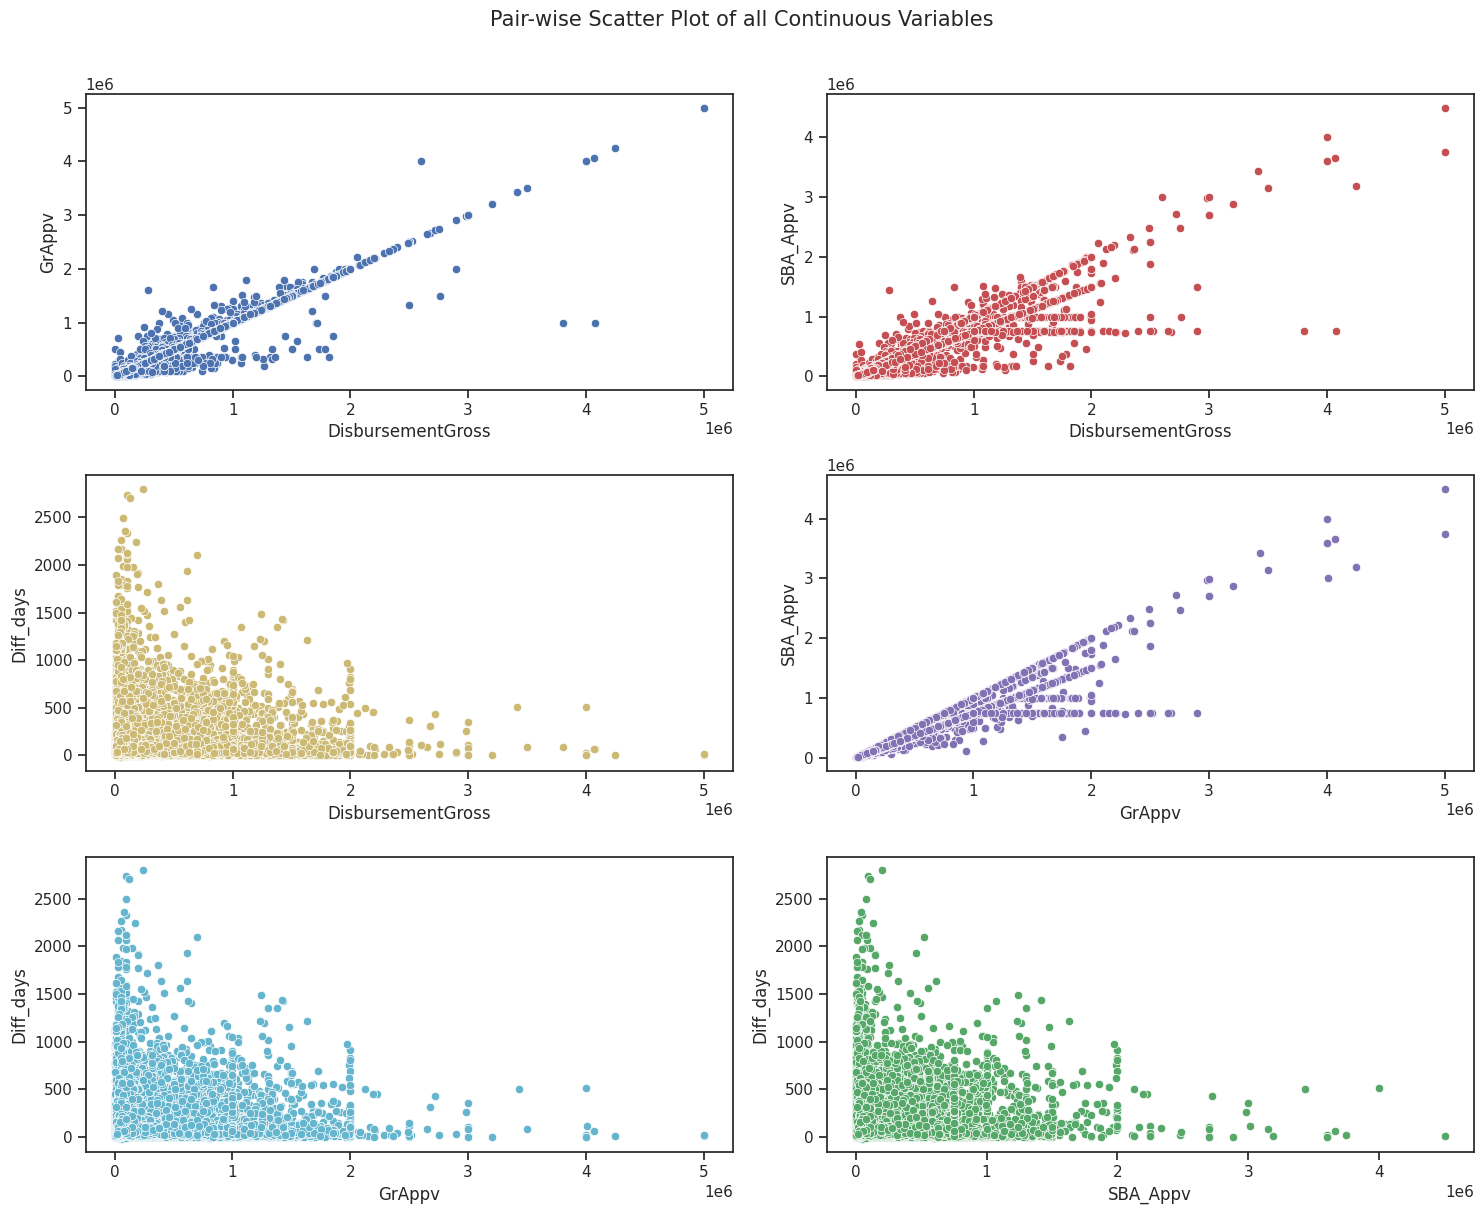

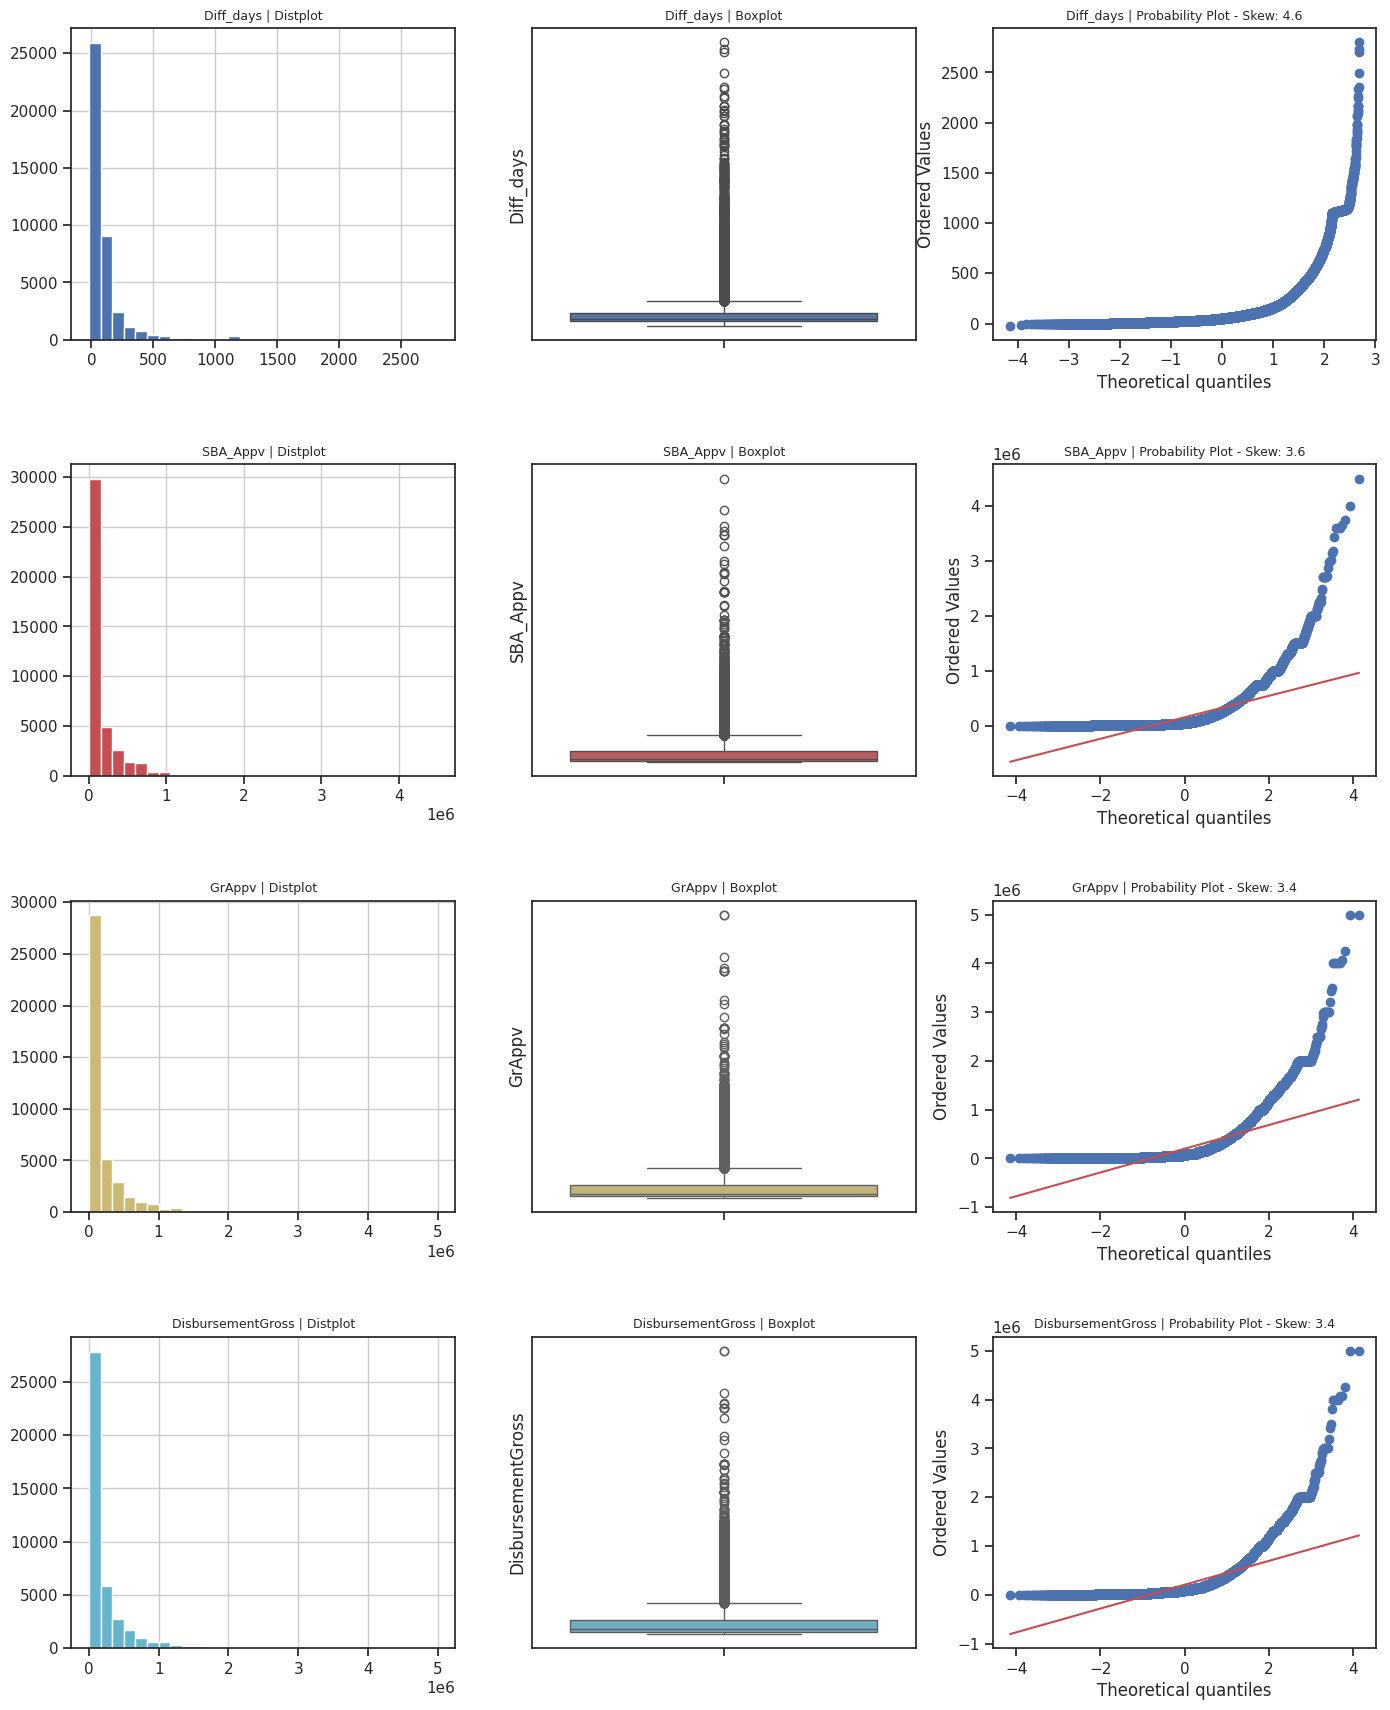

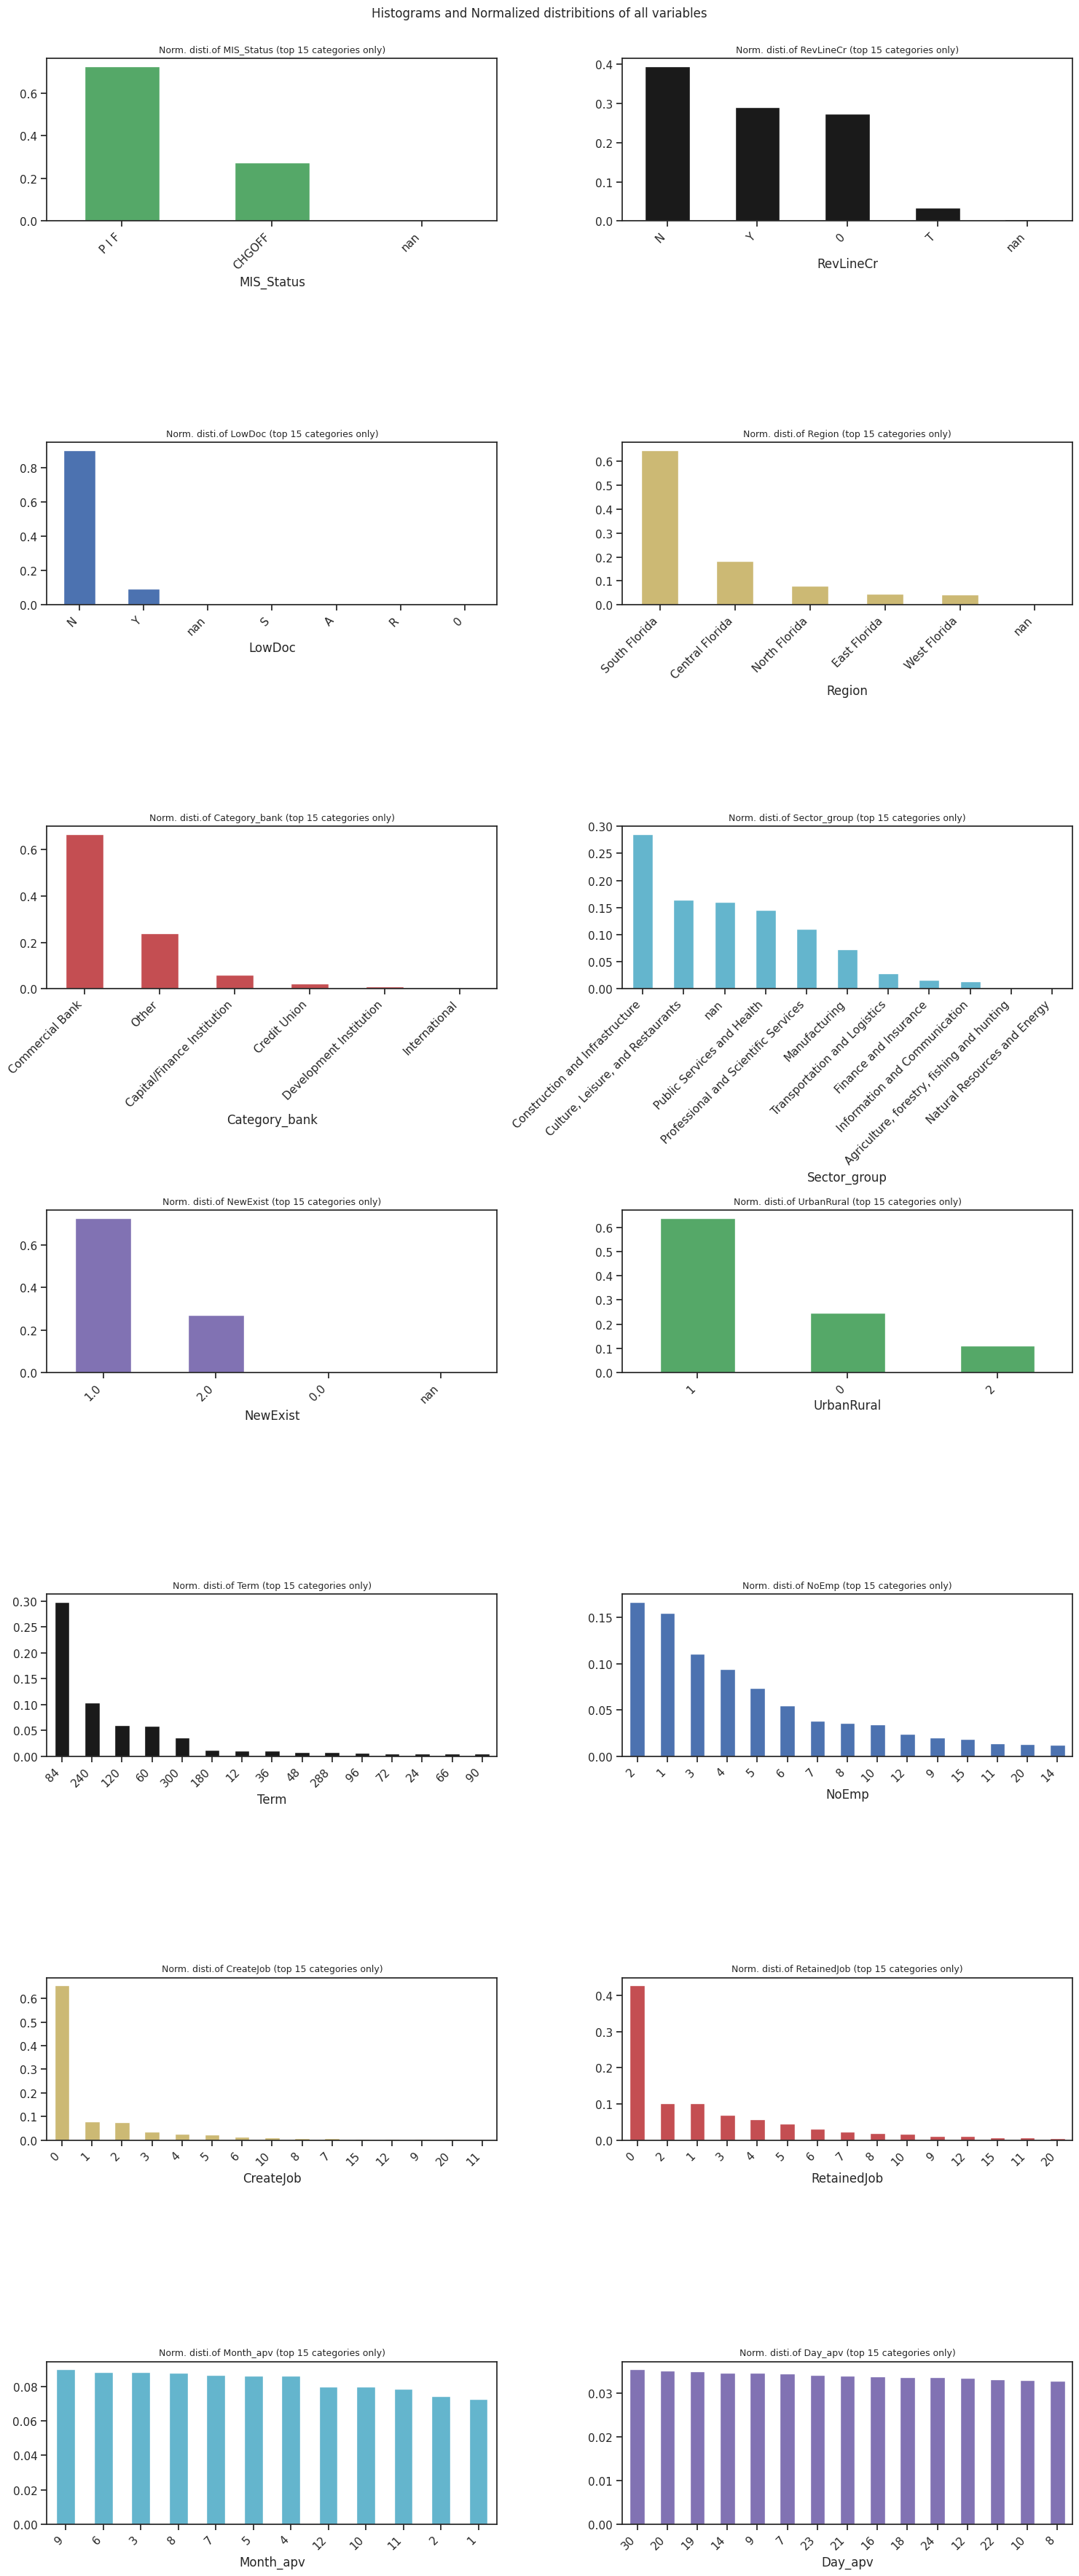

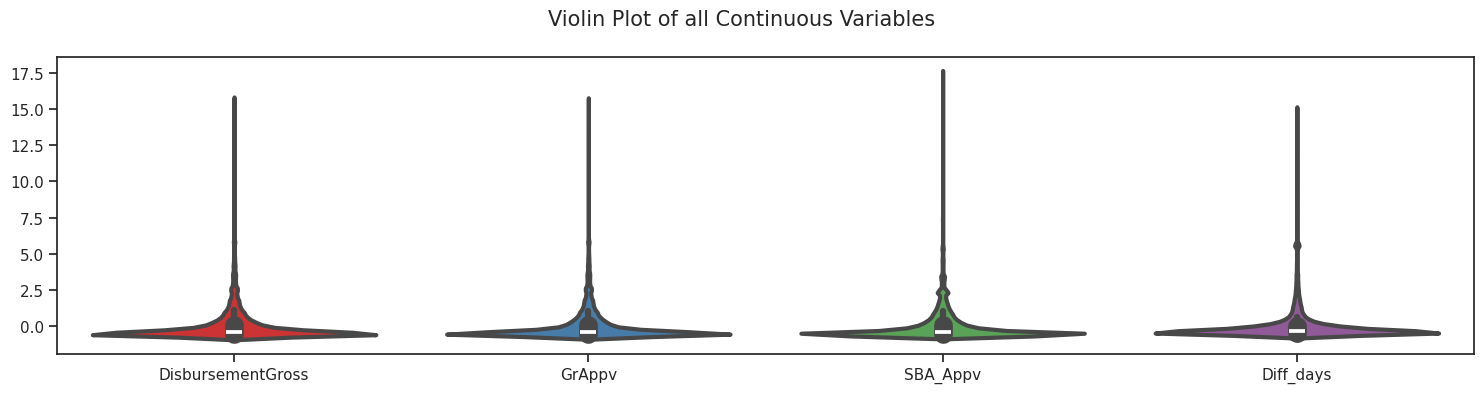

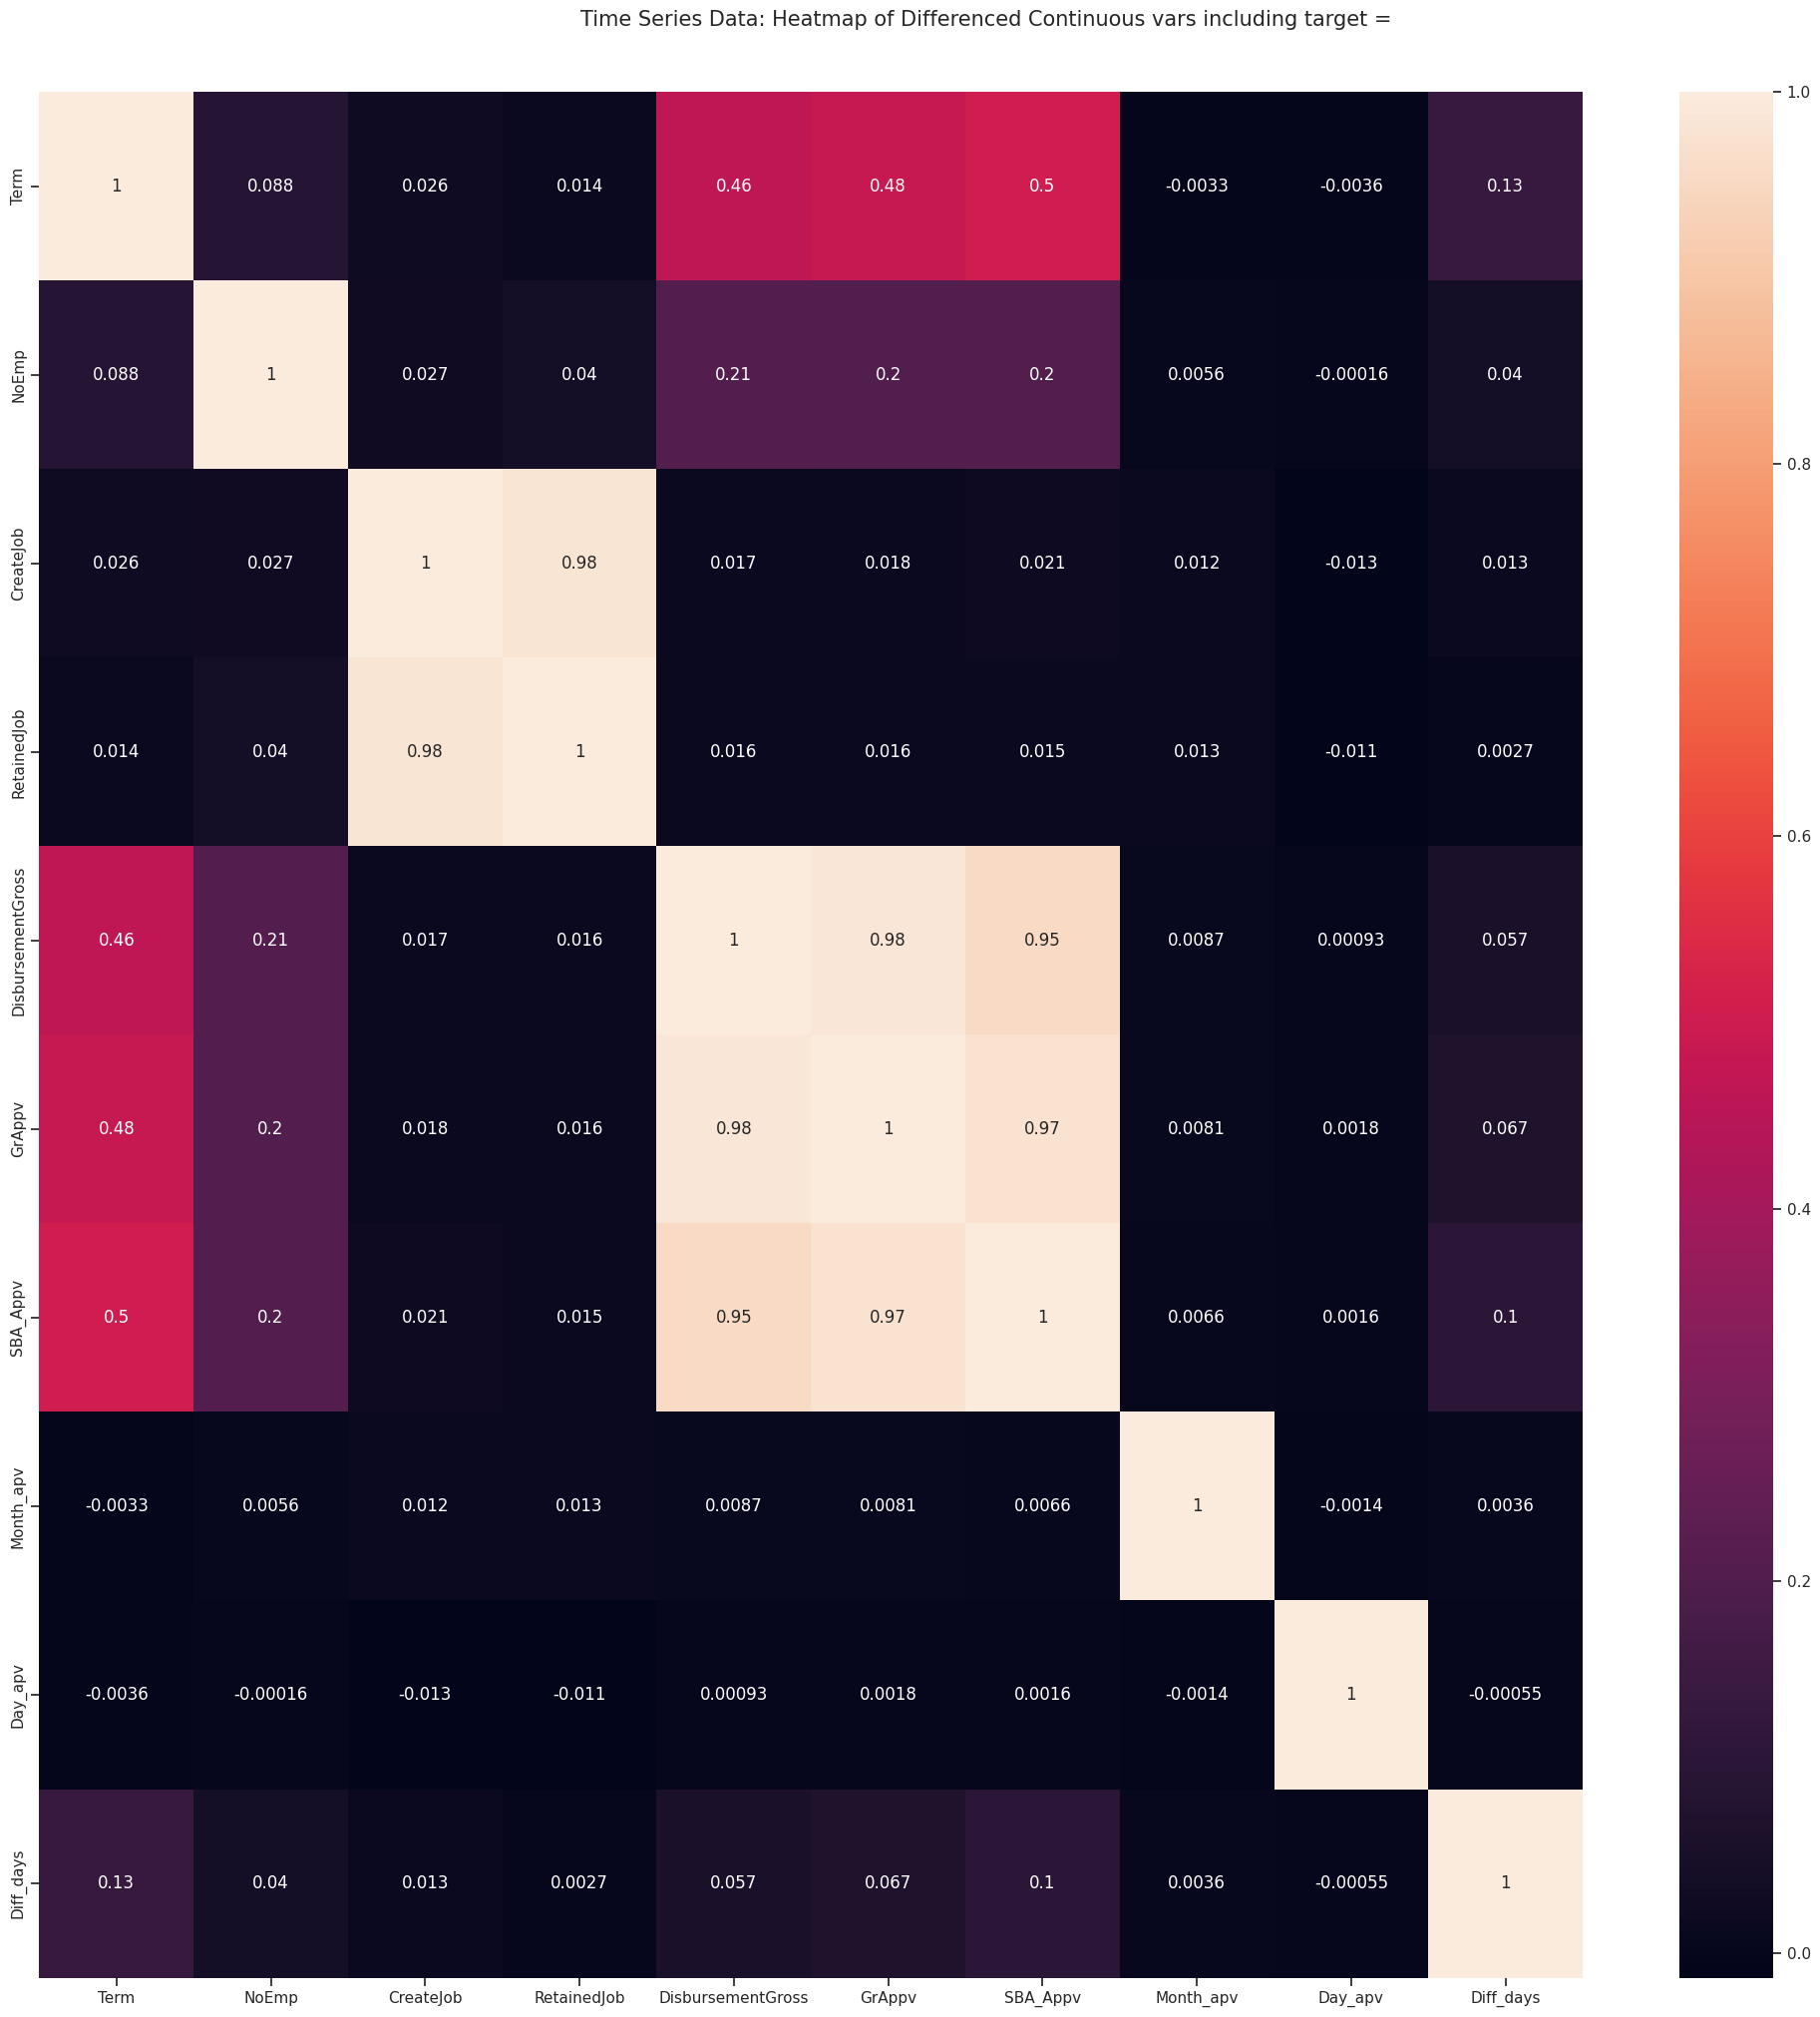

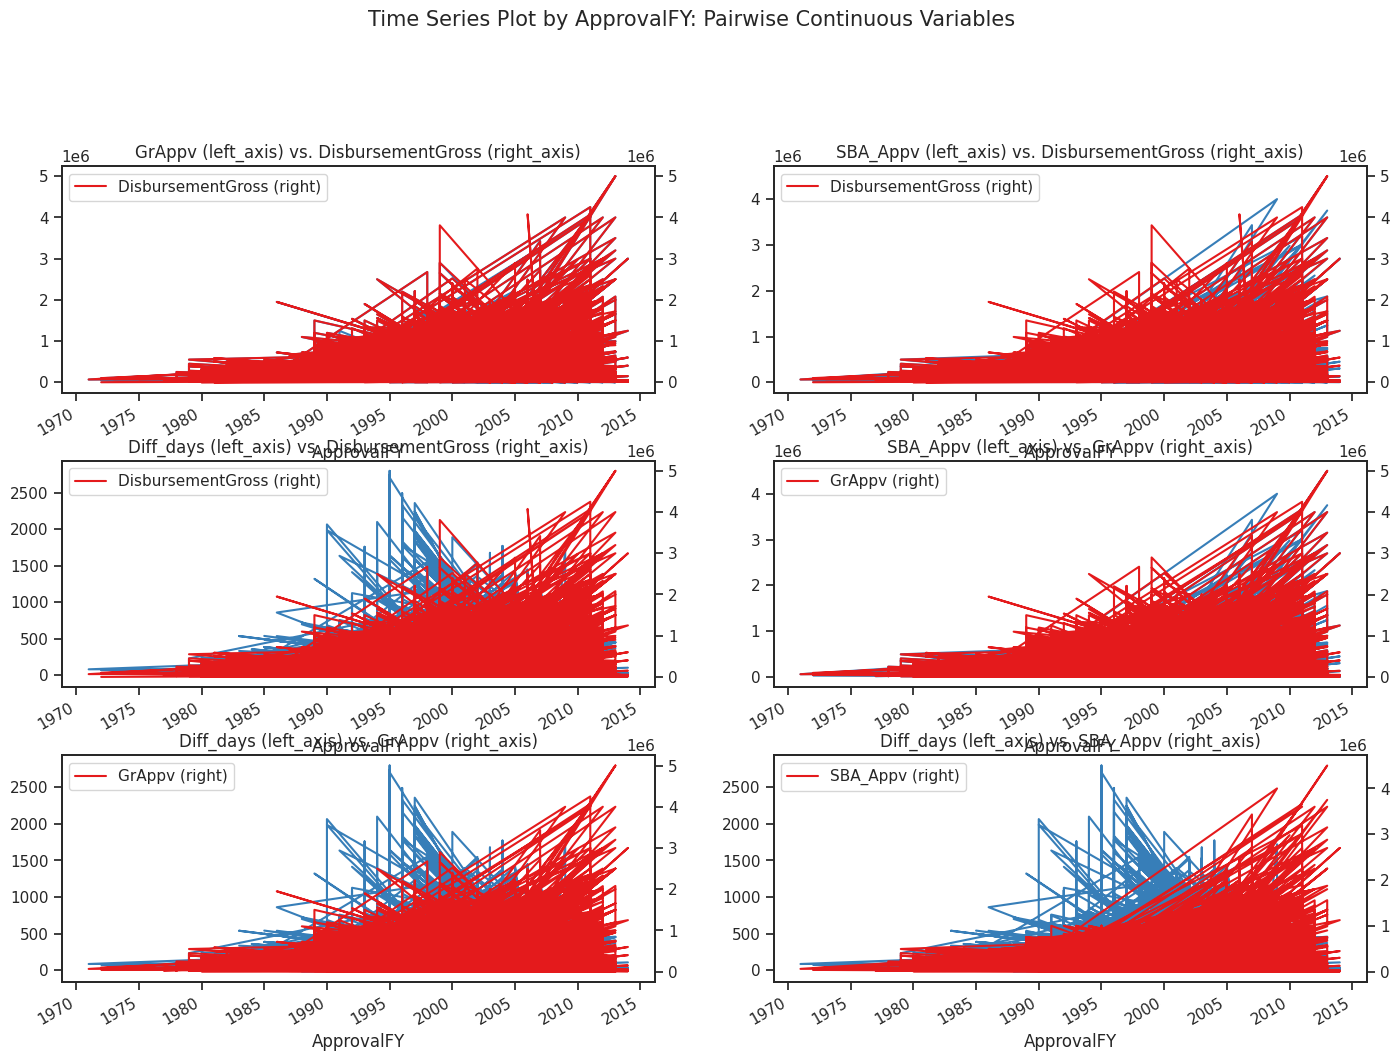

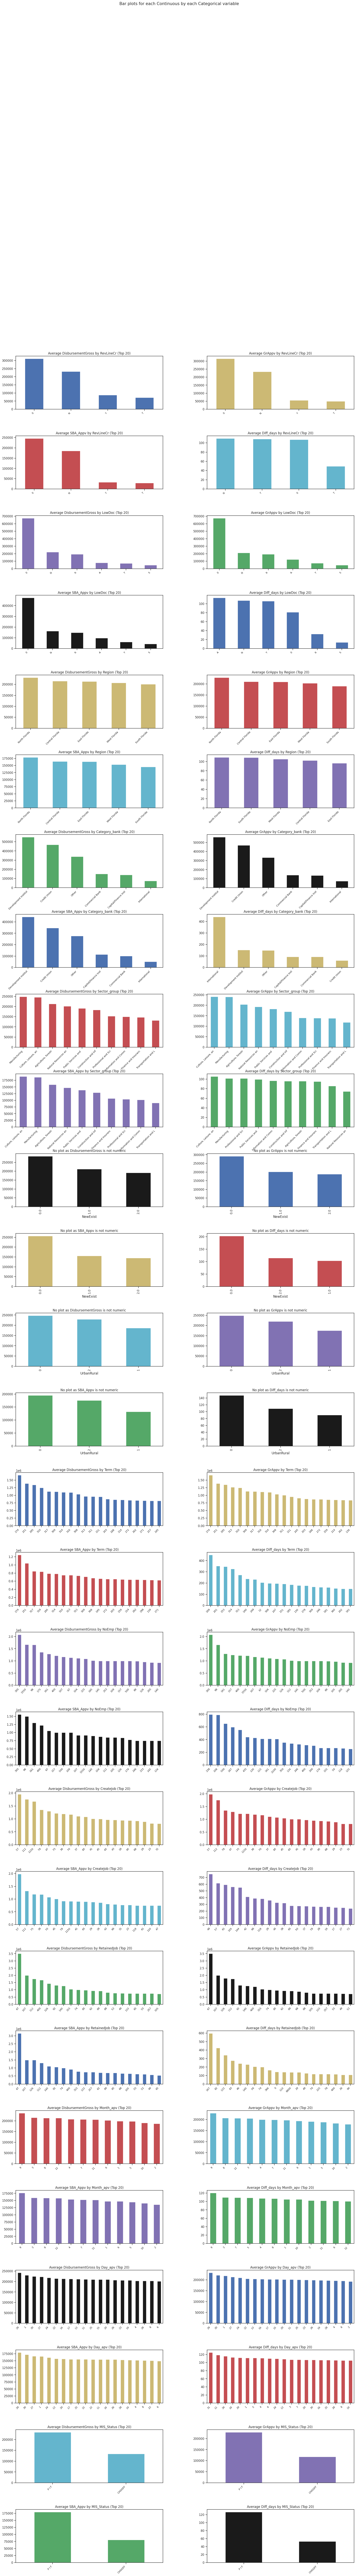

All Plots done
Time to run AutoViz = 33 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


ApprovalFY  Term  NoEmp NewExist  CreateJob  RetainedJob UrbanRural  \
0         1997      240   14      1.0        7           7           0       
1         1997       84    1      2.0        0           0           0       
2         1997      297    2      2.0        0           0           0       
3         1997       87    2      1.0        0           0           0       
4         2006       84    4      1.0        0           4           1       
...           ...   ...    ...      ...        ...          ...        ...   
41207     1997       60   15      1.0        0           0           0       
41208     1997       84    2      2.0        0           0           0       
41209     1997       60   38      2.0        0           0           0       
41210     1997      240   32      1.0        0           0           0       
41211     1997       84   25      1.0        0           0           0       

      RevLineCr LowDoc  DisbursementGross MIS_Status   GrAppv    SBA_Appv  \
0          N       N         229000.0        P I F     229000.0  229000.0   
1          N       Y          45000.0        P I F      45000.0   36000.0   
2          N       N         305000.0        P I F     305000.0  228750.0   
3          N       N          70000.0        P I F      70000.0   56000.0   
4          Y       N          51440.0        P I F      35000.0   17500.0   
...         ...    ...                ...        ...        ...       ...   
41207      N       Y          95000.0        P I F      95000.0   76000.0   
41208      N       Y          20000.0        P I F      20000.0   16000.0   
41209      N       N         145000.0        P I F     145000.0  108750.0   
41210      0       N         625000.0        P I F     625000.0  468750.0   
41211      N       N        1000000.0        P I F    1000000.0  750000.0   

           Region      Is_Franchise  Category_bank    \
0         East Florida       1                 Other   
1        South Florida       1       Commercial Bank   
2      Central Florida       1       Commercial Bank   
3        South Florida       1                 Other   
4        South Florida       1                 Other   
...                ...          ...              ...   
41207  Central Florida       1                 Other   
41208    North Florida       1       Commercial Bank   
41209    South Florida       1       Commercial Bank   
41210     East Florida       1       Commercial Bank   
41211    South Florida       1                 Other   

                 Sector_group             Month_apv  Day_apv  Diff_days  
0                                    NaN      2        28        75.0    
1      Culture, Leisure, and Restaurants      2        28       487.0    
2      Culture, Leisure, and Restaurants      2        28       153.0    
3             Public Services and Health      2        28       184.0    
4        Construction and Infrastructure      2         7        21.0    
...                                  ...        ...      ...        ...  
41207                                NaN      2        25       187.0    
41208                                NaN      2        25        34.0    
41209                                NaN      2        26       398.0    
41210                      Manufacturing      2        26        33.0    
41211                                NaN      2        26        63.0    

[41212 rows x 20 columns]

In [13]:
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz(df)

##Target Value

###Histograms number columns

<Axes: xlabel='MIS_Status', ylabel='count'>

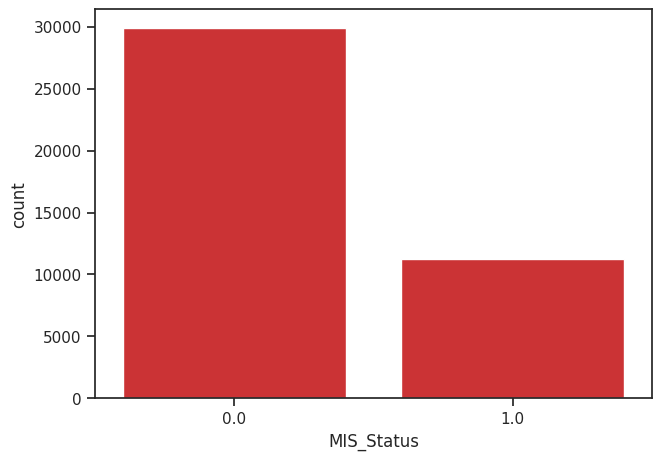

In [14]:
sns.countplot(data=df_for_eda,x='MIS_Status')

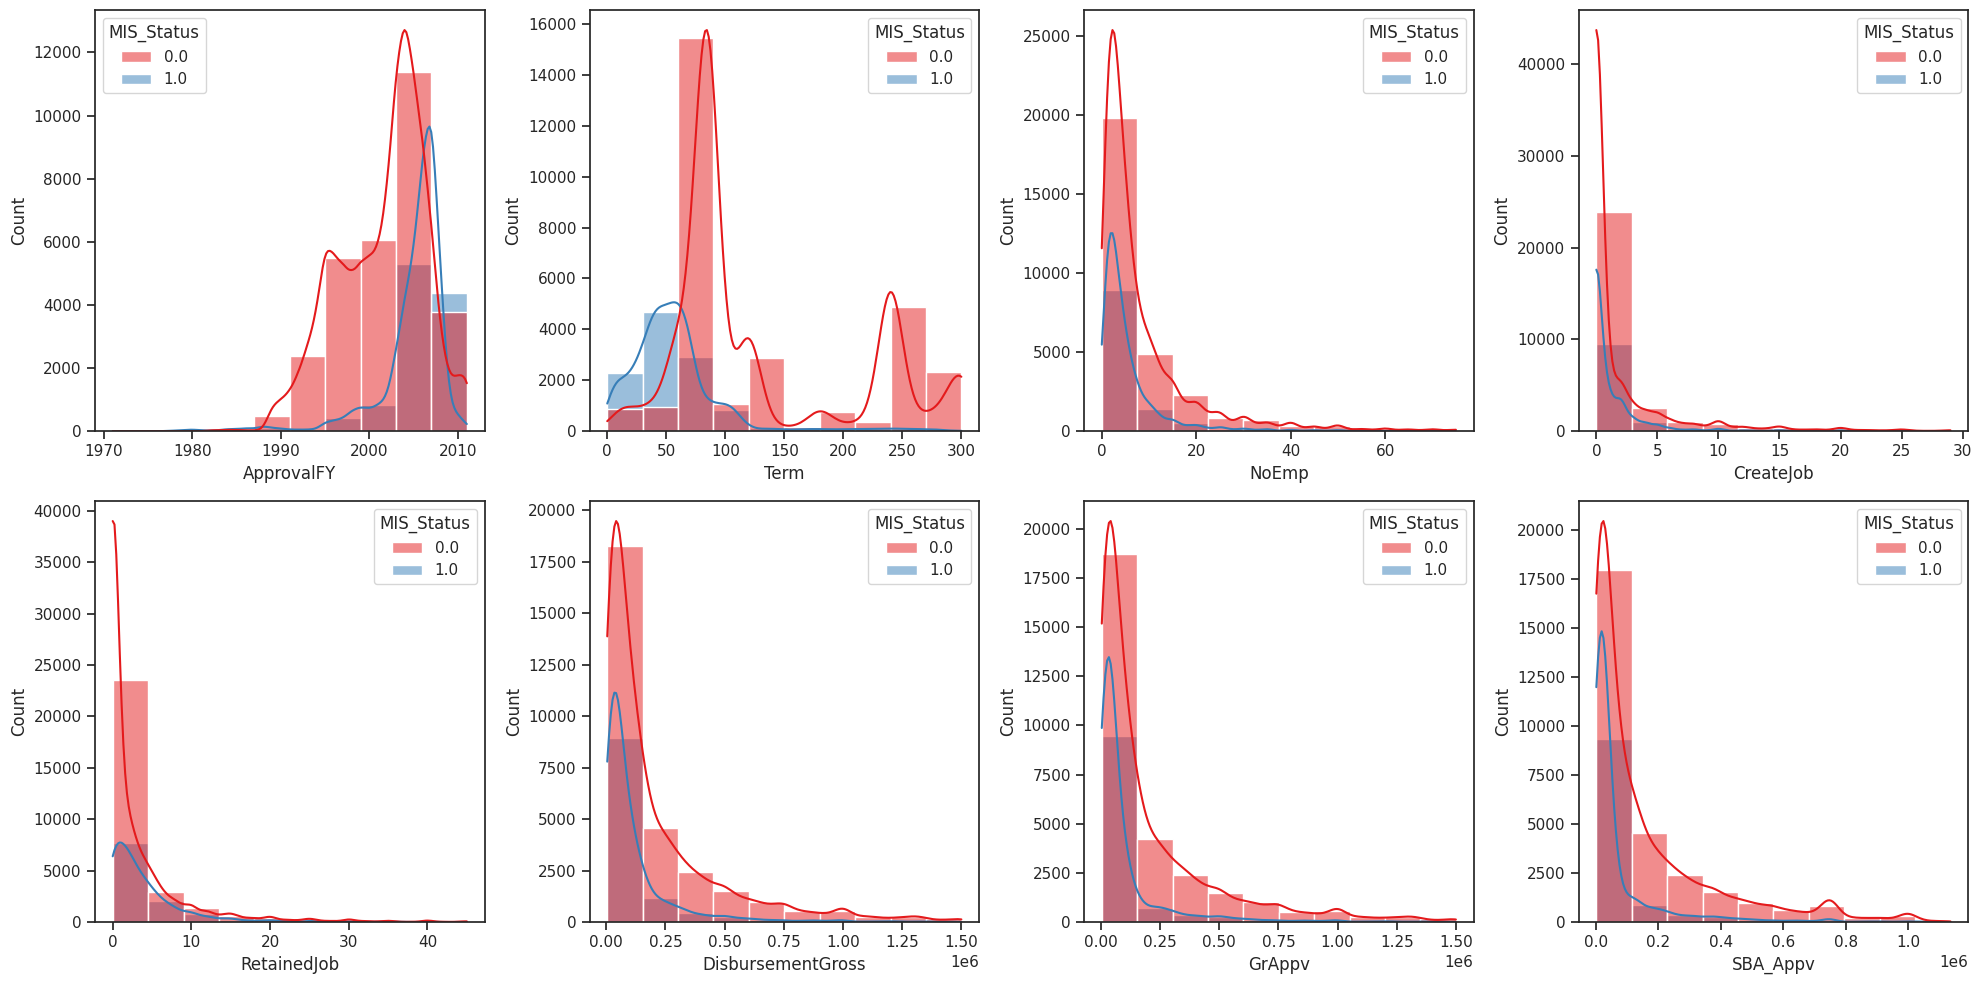

In [15]:
#Histogram plots of the number columns, by the target value
%matplotlib inline
fig,ax = plt.subplots(2,4,figsize=(20,10))
axes = ax.flatten()
for i,col in enumerate(num_columns[:8]):
  prc_99 = df_for_eda[col].quantile(0.99)
  sns.histplot(data=df_for_eda[df_for_eda[col]<=prc_99],x=col,hue='MIS_Status',kde=True,ax=axes[i],bins=10)


plt.subplots_adjust(hspace=0.5,wspace=0.8)


plt.tight_layout()

plt.show()

We can see that most of the observations for unpaid loans have a short loan duration.


---


Additionally, we can see that most of the observations for loans that were ultimately unpaid are concentrated in the later years.

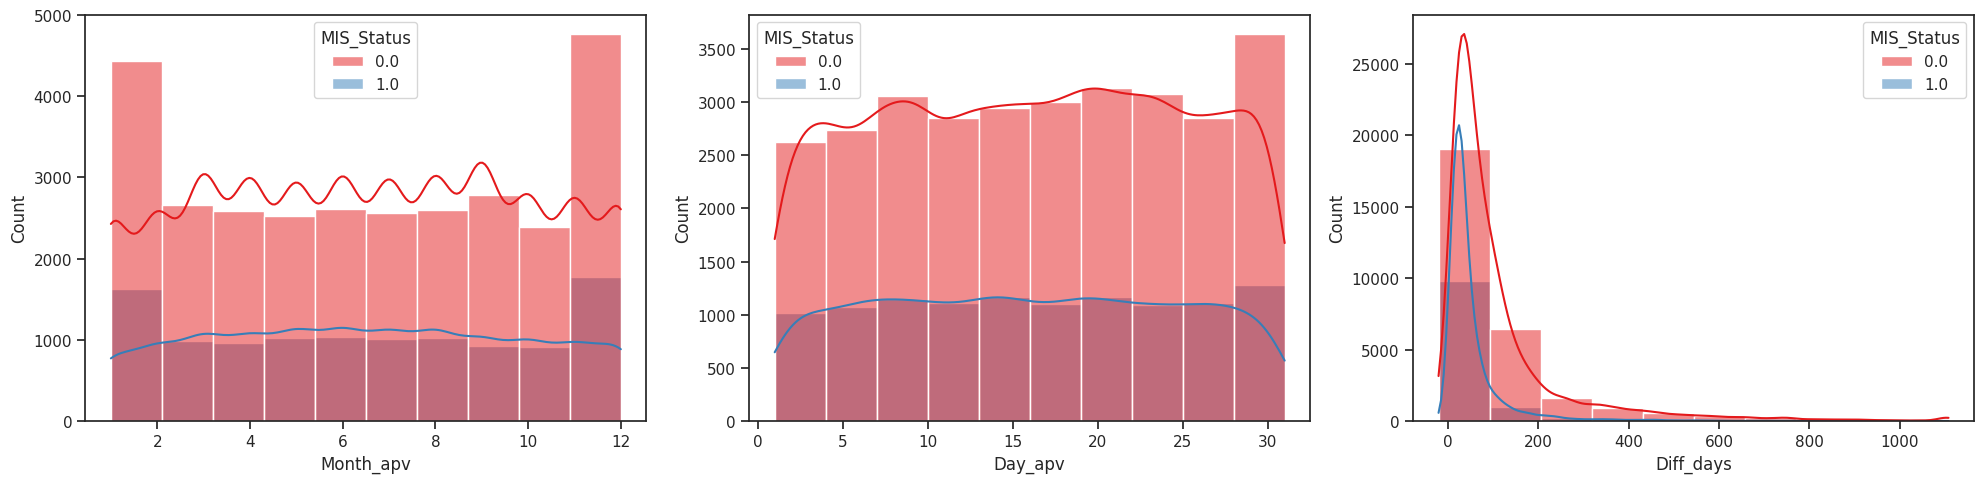

In [16]:
#Histogram plots of the number columns, by the target value
%matplotlib inline
fig,ax = plt.subplots(1,3,figsize=(20,5))
axes = ax.flatten()
for i,col in enumerate(num_columns[8:]):
  prc_99 = df_for_eda[col].quantile(0.99)
  try:
    sns.histplot(data=df_for_eda[df_for_eda[col]<=prc_99],x=col,hue='MIS_Status',kde=True,ax=axes[i],bins=10)
  except:
    sns.histplot(data=df_for_eda,x=col,hue='MIS_Status',ax=axes[i])

plt.subplots_adjust(hspace=0.5,wspace=0.8)


plt.tight_layout()

plt.show()

###Countplot category columns

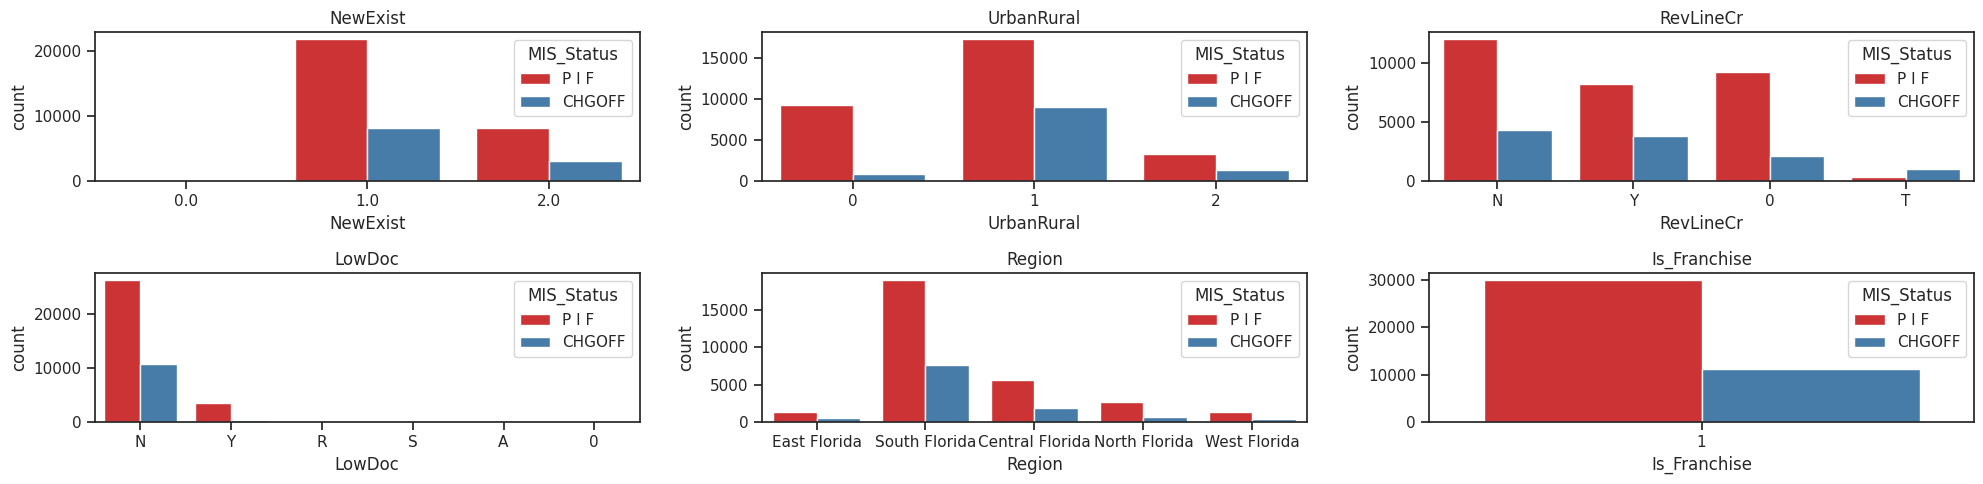

In [21]:
#Plot for category columns, by target value
%matplotlib inline
fig,ax = plt.subplots(2,3,figsize=(20,5))
axes = ax.flatten()
for i,col in enumerate(cat_columns[:6]):
  sns.countplot(data=df,x=col,hue='MIS_Status',ax=axes[i],dodge=True)
  axes[i].set_title(col)

plt.subplots_adjust(hspace=0.5,wspace=1.6)
plt.tight_layout()

plt.show()

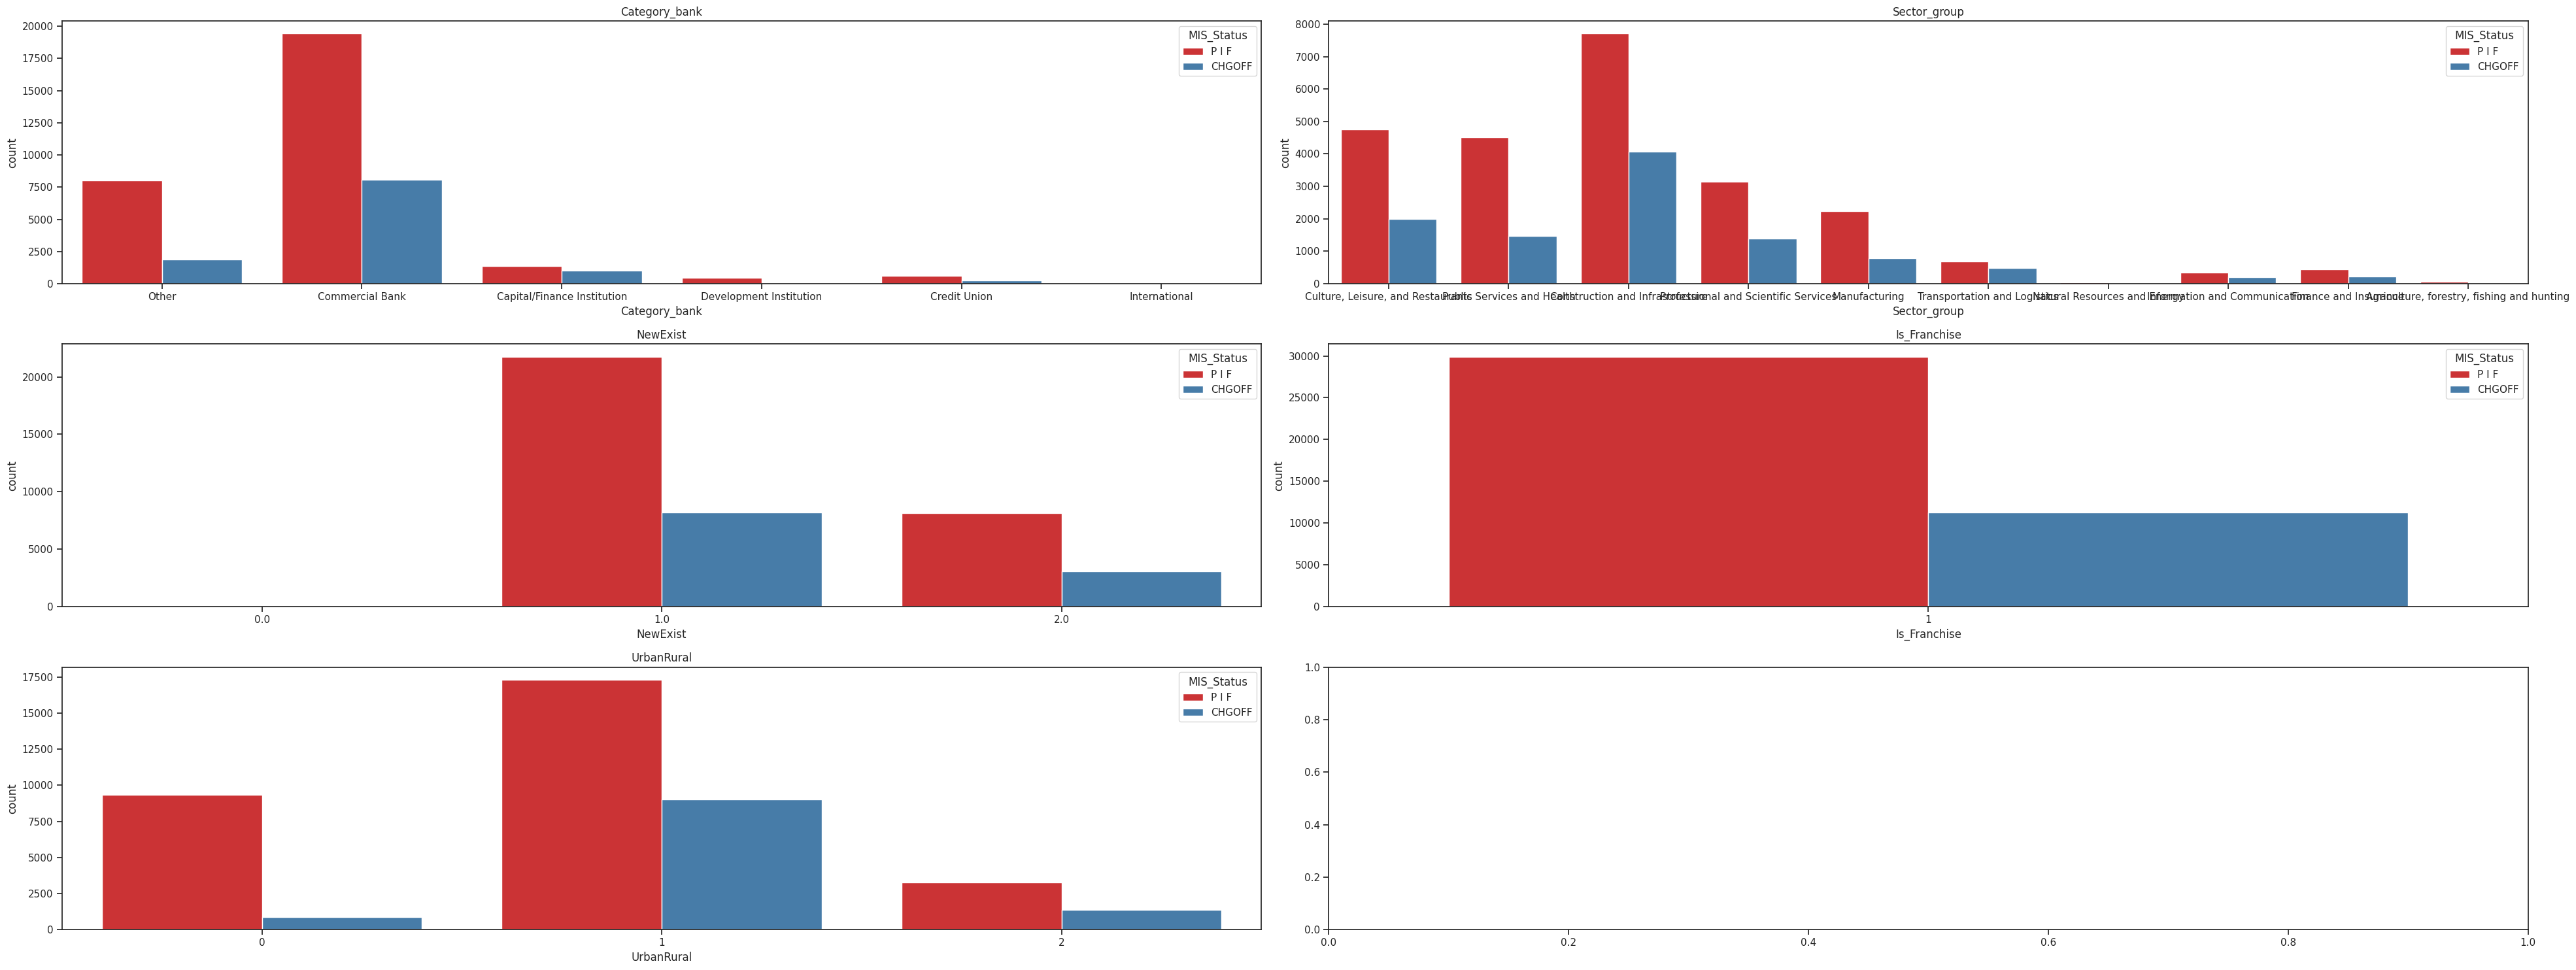

In [35]:
%matplotlib inline
fig,ax = plt.subplots(3,2,figsize=(30,15))
axes = ax.flatten()
for i,col in enumerate(cat_columns[6:]):
  sns.countplot(data=df,x=col,hue='MIS_Status',ax=axes[i],dodge=True)
  axes[i].set_title(col)

plt.subplots_adjust(hspace=0.5,wspace=1.6)
plt.tight_layout()

plt.show()

###Comapre groups by target

In [25]:
df_group_year_apv = Functions_for_EDA.percent_paid_not_paid(df_for_eda=df_for_eda,col_groups='ApprovalFY')
df_group_year_apv.head()

all  paid   unpaid  paid_perc  unpaid_perc
ApprovalFY                                            
2014         12   12.0     NaN  1.000000         NaN  
2013        105   98.0     7.0  0.933333    0.066667  
2012        214  198.0    16.0  0.925234    0.074766  
2011        522  470.0    52.0  0.900383    0.099617  
2010        577  445.0   132.0  0.771231    0.228769

In [26]:
df_group_year_apv = df_group_year_apv.dropna(subset=['unpaid_perc'])
fig = px.line(
    df_group_year_apv,
    x=df_group_year_apv.index,
    y=['unpaid_perc', 'paid_perc'],
    labels={'value': 'Percentage', 'variable': 'Metric'},
    title='Unpaid Percentage and Paid Percentage Over Time'
)

fig.update_layout(
    xaxis_title="Approve year loan",
    yaxis_title="Percentage (%)",
    legend_title="Paid/unpaid"
)

fig.show()



We can see that between the years 1983 and 1989, there was a high rate of unpaid loans, as well as between the years 2006 and 2009.

In [27]:
def highlight_max_in_columns(df, columns_to_highlight, color='red'):
    def highlight_max(series):
        is_max = series == series.max()
        return ['background-color: {}'.format(color) if v else '' for v in is_max]

    styled_df = df.style.apply(highlight_max, subset=columns_to_highlight, axis=0)
    return styled_df

In [28]:
# Comparison of the percentage of loans paid versus those notpaid, based on the rural/urban.
df_group_urban = Functions_for_EDA.percent_paid_not_paid(df_for_eda=df_for_eda,col_groups='UrbanRural')

columns_to_highlight = ['unpaid_perc']
styled_df_urban = highlight_max_in_columns(df_group_urban, columns_to_highlight)

styled_df_urban


In [29]:
# Comparison of the percentage of loans paid versus those notpaid, based on the region.

df_group_region = Functions_for_EDA.percent_paid_not_paid(df_for_eda=df_for_eda,col_groups='Region')

columns_to_highlight = ['unpaid_perc']
styled_df_region = highlight_max_in_columns(df_group_region, columns_to_highlight)

styled_df_region

In [30]:
# Comparison of the percentage of loans paid versus those notpaid, based on the sector.

df_group_sector = Functions_for_EDA.percent_paid_not_paid(df_for_eda=df_for_eda,col_groups='Sector_group')

columns_to_highlight = ['unpaid_perc']
styled_df_sector = highlight_max_in_columns(df_group_sector, columns_to_highlight)

styled_df_sector

#Skweness

In [31]:
pd.DataFrame(df_for_eda.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False)

skewness 
CreateJob          67.043421
RetainedJob        65.106644
NoEmp              37.338631
Diff_days           4.576929
SBA_Appv            3.611635
DisbursementGross   3.420117
GrAppv              3.370114
LowDoc              2.459087
Term                1.129353
Category_bank       1.083428
MIS_Status          1.015195
NewExist            0.994592
Sector_group        0.447815
RevLineCr           0.390062
UrbanRural          0.030083
Is_Franchise        0.000000
Month_apv          -0.002447
Day_apv            -0.016943
ApprovalFY         -0.848108
Region             -1.084749

It can be seen that almost all the features are not normally distributed.

#Correlation

<Axes: >

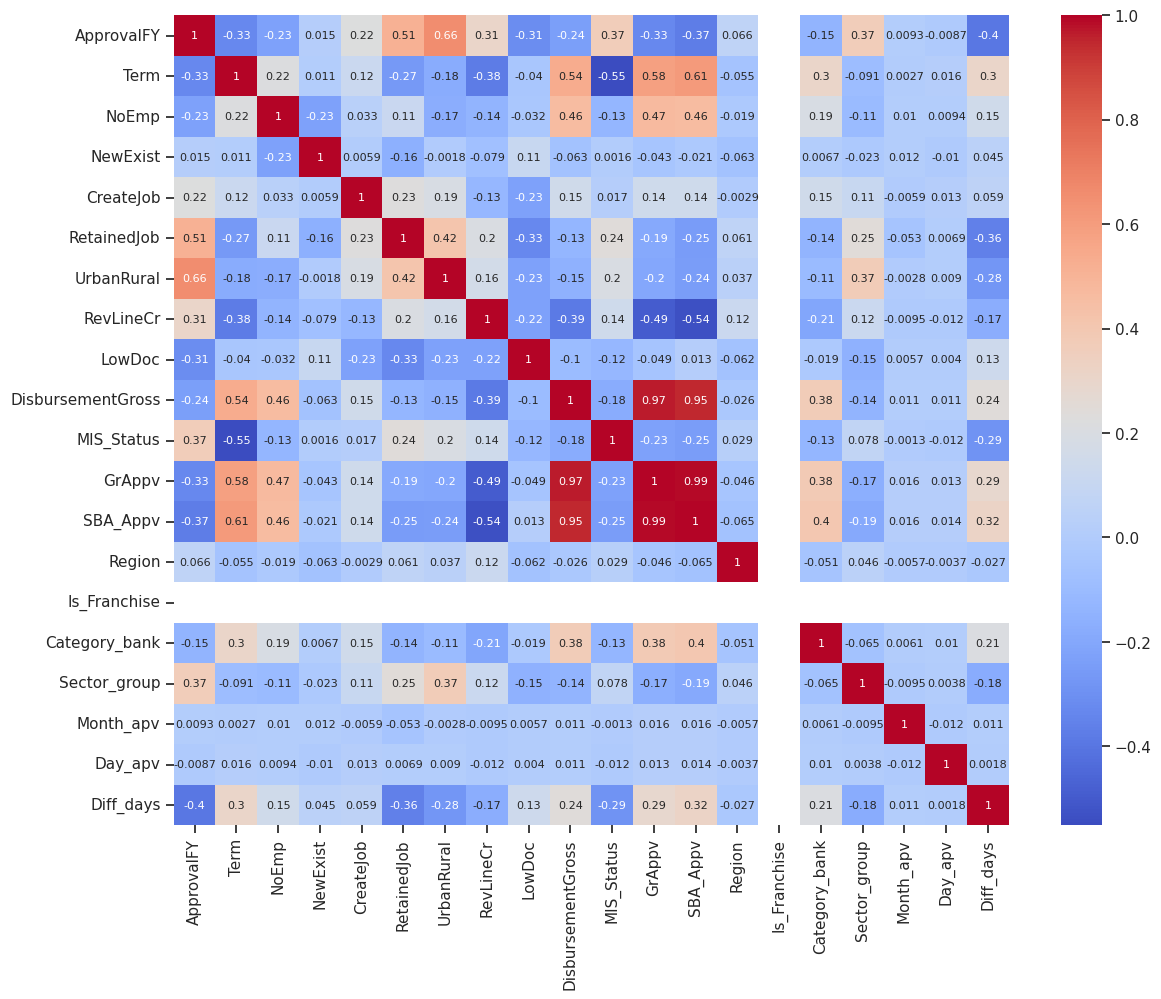

In [32]:
#Becasue most of features not have normal distribution use spearman method
plt.figure(figsize=(12, 10))
sns.heatmap(df_for_eda.corr(method='spearman'),annot=True,cmap="coolwarm",annot_kws={"size": 8})

It can be seen that there is a certain degree of correlation (0.66) between the

rural/urban variable and the loan approval year.

---
There is also a very strong relationship, as expected, between the loan amount and the amount of money the SBA guaranteed, as well as between the loan amount and the amount the borrower received.

---

Additionally, it can be observed that to some extent, there is a relationship between the loan duration and the amount of money guaranteed by the SBA.

#Tests

##Mann withney

In [33]:
#To determine if there is a significant difference between those who paid and those whose charged off ,
#in the numerical features, we will use the Mann-Whitney test since the skewness showed that the distribution of these features is not normal.
dict_mann = {}
for col in num_columns:
  stat, p = mannwhitneyu(df_for_eda[df_for_eda['MIS_Status']==0][col], df_for_eda[df_for_eda['MIS_Status']==1][col])
  dict_mann[col] = p

df_mann_p = pd.DataFrame(dict_mann,index=['p-value']).T.sort_values(by='p-value')
df_mann_p

p-value   
ApprovalFY          0.000000e+00
Term                0.000000e+00
GrAppv              0.000000e+00
RetainedJob         0.000000e+00
SBA_Appv            0.000000e+00
DisbursementGross  9.096340e-282
NoEmp              1.591362e-150
CreateJob           5.896328e-04
Day_apv             1.824924e-02
Month_apv           7.954766e-01
Diff_days                    NaN

It can be seen that there is a significant difference between the two groups in all the variables.

## Chei-Square

In [34]:
# in the category features, we will use the chei-square test since the skewness showed that the distribution of these features is not normal
# and we test the difference between categories.

chi_dict ={}
for col in cat_columns:
  contingency_table = pd.crosstab(df_for_eda[col], df_for_eda['MIS_Status'])
  results = chi2_contingency(contingency_table)
  chi_dict[col] = results.pvalue

df_chi_p = pd.DataFrame(chi_dict,index=['p-value']).T.sort_values(by='p-value')

df_tests = pd.concat([df_mann_p,df_chi_p])
df_tests






p-value   
ApprovalFY          0.000000e+00
Term                0.000000e+00
GrAppv              0.000000e+00
RetainedJob         0.000000e+00
SBA_Appv            0.000000e+00
DisbursementGross  9.096340e-282
NoEmp              1.591362e-150
CreateJob           5.896328e-04
Day_apv             1.824924e-02
Month_apv           7.954766e-01
Diff_days                    NaN
UrbanRural          0.000000e+00
RevLineCr           0.000000e+00
Sector_group        0.000000e+00
Category_bank      3.618805e-175
LowDoc             1.162285e-146
Region              3.360592e-32
NewExist            6.565609e-02
Is_Franchise        1.000000e+00

It can be seen that there is a significant difference between the two groups also in category variables.